<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
## Write your code here
# 2. Display shape of original dataset
print("Original dataset shape:", df.shape)

# 3. Define subset of columns to check for duplicates
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
    'Age', 'CodingActivities', 'LearnCodeOnline',
    'YearsCodePro', 'DevType'
]

# 4. Identify number of duplicate rows based on subset
duplicates = df.duplicated(subset=subset_cols)
num_duplicates = duplicates.sum()

print("Number of duplicate rows based on subset columns:", num_duplicates)

Original dataset shape: (65437, 114)
Number of duplicate rows based on subset columns: 4853


In [7]:
## Write your code here
# 1. Remove duplicates based on subset columns
df_cleaned = df.drop_duplicates(subset=subset_cols)

# 2. Verify removal
print("Cleaned dataset shape:", df_cleaned.shape)

# Confirm there are no remaining duplicates
remaining_duplicates = df_cleaned.duplicated(subset=subset_cols).sum()
print("Remaining duplicates:", remaining_duplicates)

Cleaned dataset shape: (60584, 114)
Remaining duplicates: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
## Write your code here
missing_coding = df['CodingActivities'].isnull().sum()
print(f"Missing rows in 'CodingActivities': {missing_coding}")

Missing rows in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [9]:
## Write your code here
df['CodingActivities'].fillna(method='ffill', inplace=True)


/tmp/ipykernel_895/1764148412.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_895/1764148412.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


In [10]:
#Apply same method as in lab 9 to impute missing ConveertedCompYearly values from CompTotal
# Select numeric compensation-related columns
comp_columns = ['CompTotal', 'ConvertedCompYearly']

# Show summary stats
print(df_cleaned[comp_columns].describe())

           CompTotal  ConvertedCompYearly
count   3.297000e+04         2.302900e+04
mean   3.033060e+145         8.613505e+04
std    5.507323e+147         1.880111e+05
min     0.000000e+00         1.000000e+00
25%     6.000000e+04         3.264000e+04
50%     1.100000e+05         6.500000e+04
75%     2.500000e+05         1.079370e+05
max    1.000000e+150         1.625660e+07


In [11]:
# Include percentage missing
total_rows = len(df_cleaned)
missing_info = df_cleaned[comp_columns].isnull().sum().to_frame(name='Missing Count')
missing_info['Percent Missing'] = (missing_info['Missing Count'] / total_rows) * 100
print(missing_info)

                     Missing Count  Percent Missing
CompTotal                    27614        45.579691
ConvertedCompYearly          37555        61.988314


In [12]:
# Create boolean masks
comp_total_missing = df_cleaned['CompTotal'].isnull()
converted_missing = df_cleaned['ConvertedCompYearly'].isnull()

# Count each category
both_missing = (comp_total_missing & converted_missing).sum()
only_comptotal_missing = (comp_total_missing & ~converted_missing).sum()
only_converted_missing = (~comp_total_missing & converted_missing).sum()

# Print results
print("Missing values breakdown:")
print(f"Missing both CompTotal and ConvertedCompYearly: {both_missing}")
print(f"Missing only CompTotal: {only_comptotal_missing}")
print(f"Missing only ConvertedCompYearly: {only_converted_missing}")

Missing values breakdown:
Missing both CompTotal and ConvertedCompYearly: 27614
Missing only CompTotal: 0
Missing only ConvertedCompYearly: 9941


In [13]:
# Calculate 75th percentiles
q3_comptotal = df_cleaned['CompTotal'].quantile(0.75)
q3_converted = df_cleaned['ConvertedCompYearly'].quantile(0.75)

# Filter to remove rows above Q3 in either column
filtered_df = df_cleaned[
    (df_cleaned['CompTotal'] <= q3_comptotal) &
    (df_cleaned['ConvertedCompYearly'] <= q3_converted)
]


In [14]:
!pip install scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop any remaining rows with missing values
regression_df = filtered_df[['CompTotal', 'ConvertedCompYearly']].dropna()

# Reshape inputs for sklearn
X = regression_df['CompTotal'].values.reshape(-1, 1)
y = regression_df['ConvertedCompYearly'].values.reshape(-1, 1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Output model coefficients
print(f"Model: ConvertedCompYearly ≈ {model.coef_[0][0]:.4f} × CompTotal + {model.intercept_[0]:.2f}")

Model: ConvertedCompYearly ≈ 0.2738 × CompTotal + 34606.32


In [16]:
## Write your code here
# Identify rows with missing ConvertedCompYearly and valid CompTotal
missing_mask = df_cleaned['ConvertedCompYearly'].isnull() & df_cleaned['CompTotal'].notnull()

# Predict values using the linear model
predicted_values = model.predict(df_cleaned.loc[missing_mask, 'CompTotal'].values.reshape(-1, 1))

# Fill in the missing values
df_cleaned.loc[missing_mask, 'ConvertedCompYearly'] = predicted_values.flatten()
print(f"Filled {missing_mask.sum()} missing ConvertedCompYearly values using regression.")

Filled 9941 missing ConvertedCompYearly values using regression.


In [18]:
# Cap values at the 99th percentile
cap = df_cleaned['ConvertedCompYearly'].quantile(0.99)
df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].clip(upper=cap)

/tmp/ipykernel_895/1126023959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].clip(upper=cap)


In [19]:
print(df_cleaned['CompTotal'].describe())
print('')
print(df_cleaned['ConvertedCompYearly'].describe())

count     3.297000e+04
mean     3.033060e+145
std      5.507323e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

count    3.297000e+04
mean     1.160236e+05
std      2.378099e+05
min      1.000000e+00
25%      4.296200e+04
50%      6.476200e+04
75%      1.074060e+05
max      2.028369e+06
Name: ConvertedCompYearly, dtype: float64


In [20]:
# Include percentage missing
total_rows = len(df_cleaned)
missing_info = df_cleaned[comp_columns].isnull().sum().to_frame(name='Missing Count')
missing_info['Percent Missing'] = (missing_info['Missing Count'] / total_rows) * 100
print(missing_info)

                     Missing Count  Percent Missing
CompTotal                    27614        45.579691
ConvertedCompYearly          27614        45.579691


In [21]:
#Drop remaining rows with missing compensation data
df_cleaned = df_cleaned.dropna(subset=['ConvertedCompYearly', 'CompTotal'])


In [22]:
# Include percentage missing
total_rows = len(df_cleaned)
missing_info = df_cleaned[comp_columns].isnull().sum().to_frame(name='Missing Count')
missing_info['Percent Missing'] = (missing_info['Missing Count'] / total_rows) * 100
print(missing_info)

                     Missing Count  Percent Missing
CompTotal                        0              0.0
ConvertedCompYearly              0              0.0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [23]:
## Write your code here
print(df_cleaned['ConvertedCompYearly'].describe())



count    3.297000e+04
mean     1.160236e+05
std      2.378099e+05
min      1.000000e+00
25%      4.296200e+04
50%      6.476200e+04
75%      1.074060e+05
max      2.028369e+06
Name: ConvertedCompYearly, dtype: float64


In [24]:
#Large stdev indicates outliers and min salary of $1/yr is unreasonable. Filter out entries below $1000/yr and above 99th percentile
df_cleaned = df_cleaned[df_cleaned['ConvertedCompYearly'] >= 1000]
upper_limit = df_cleaned['ConvertedCompYearly'].quantile(0.99)
df_cleaned = df_cleaned[df_cleaned['ConvertedCompYearly'] <= upper_limit]


In [25]:
print(df_cleaned['ConvertedCompYearly'].describe())


count    3.243300e+04
mean     1.179387e+05
std      2.393005e+05
min      1.000000e+03
25%      4.418870e+04
50%      6.609128e+04
75%      1.074060e+05
max      2.028369e+06
Name: ConvertedCompYearly, dtype: float64


In [26]:
# Calculate the 1st percentile
lower_1pct = df_cleaned['ConvertedCompYearly'].quantile(0.01)

# Count how many values are below that
num_below_1pct = (df_cleaned['ConvertedCompYearly'] < lower_1pct).sum()

print(f"1st percentile: {lower_1pct:,.2f}")
print(f"Number of values below 1st percentile: {num_below_1pct}")


1st percentile: 2,061.28
Number of values below 1st percentile: 325


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [27]:
## Write your code here
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df_cleaned[['ConvertedCompYearly']])


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [28]:
## Write your code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned['ConvertedCompYearly_Zscore'] = scaler.fit_transform(df_cleaned[['ConvertedCompYearly']])


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


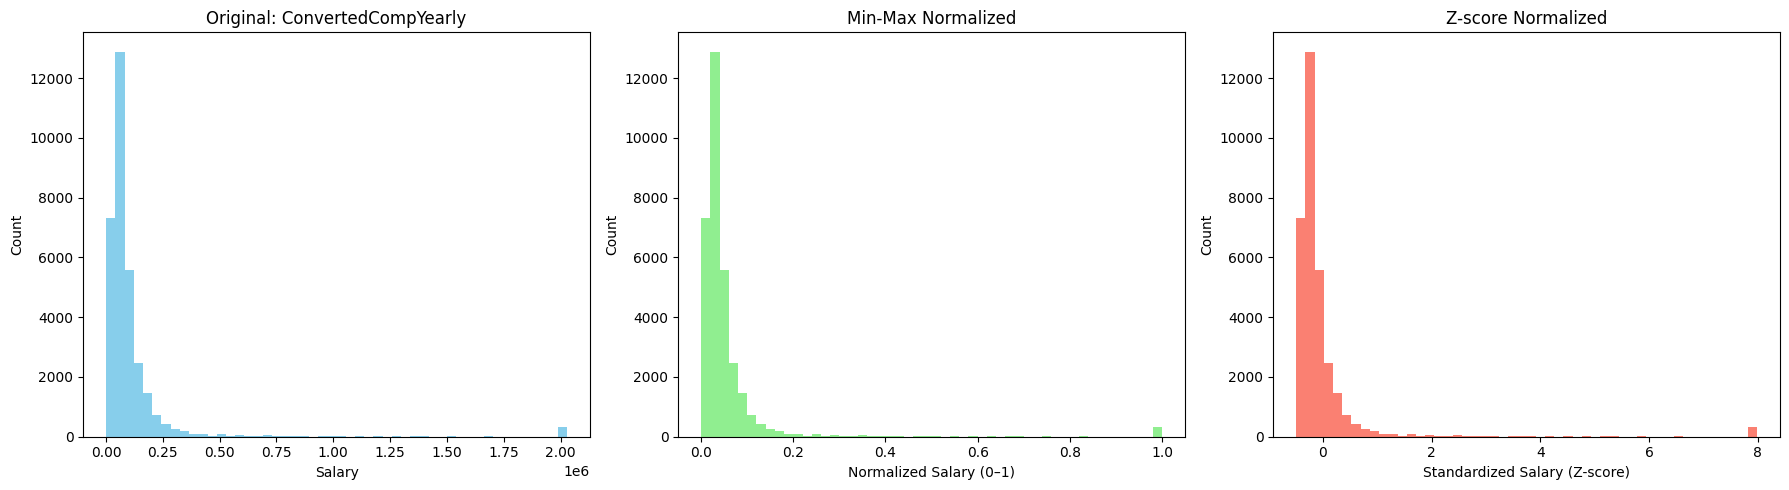

In [29]:
## Write your code here
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 3, 1)
plt.hist(df_cleaned['ConvertedCompYearly'], bins=50, color='skyblue')
plt.title('Original: ConvertedCompYearly')
plt.xlabel('Salary')
plt.ylabel('Count')

# Min-Max Scaled
plt.subplot(1, 3, 2)
plt.hist(df_cleaned['ConvertedCompYearly_MinMax'], bins=50, color='lightgreen')
plt.title('Min-Max Normalized')
plt.xlabel('Normalized Salary (0–1)')
plt.ylabel('Count')

# Z-score Scaled
plt.subplot(1, 3, 3)
plt.hist(df_cleaned['ConvertedCompYearly_Zscore'], bins=50, color='salmon')
plt.title('Z-score Normalized')
plt.xlabel('Standardized Salary (Z-score)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


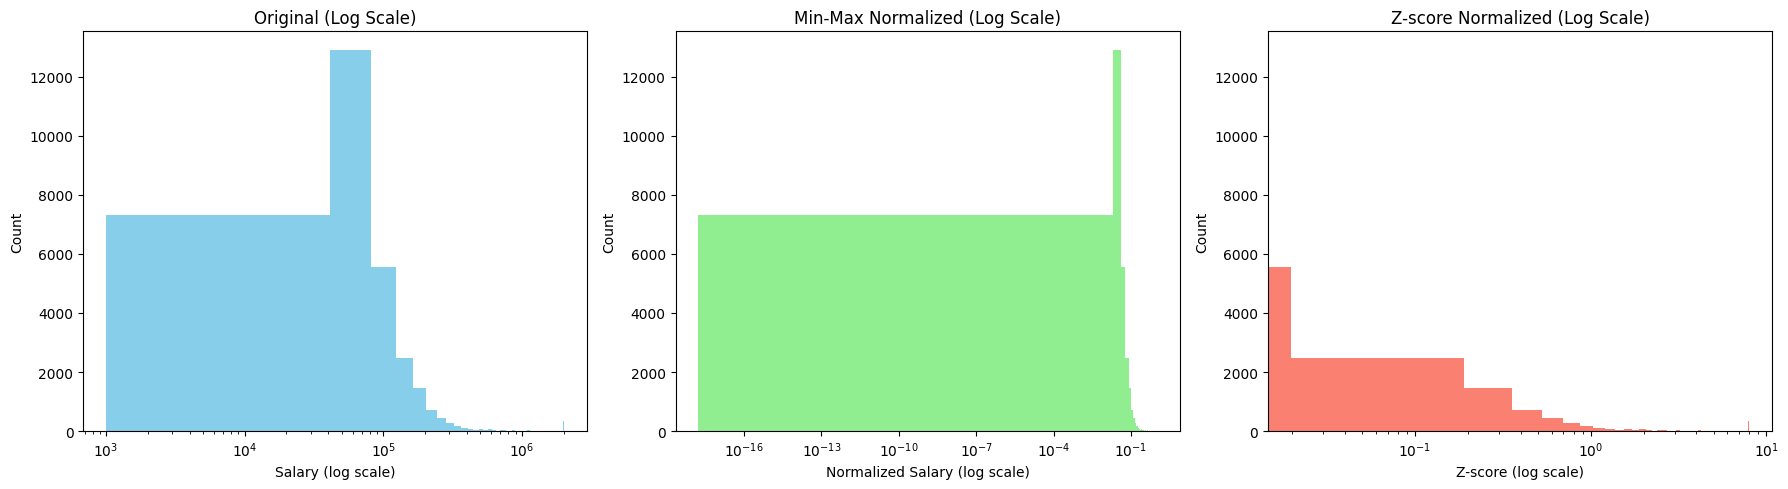

In [30]:
#Using log scale to better visualize the lower end salaries
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 3, 1)
plt.hist(df_cleaned['ConvertedCompYearly'], bins=50, color='skyblue')
plt.xscale('log')
plt.title('Original (Log Scale)')
plt.xlabel('Salary (log scale)')
plt.ylabel('Count')

# Min-Max
plt.subplot(1, 3, 2)
plt.hist(df_cleaned['ConvertedCompYearly_MinMax'], bins=50, color='lightgreen')
plt.xscale('log')
plt.title('Min-Max Normalized (Log Scale)')
plt.xlabel('Normalized Salary (log scale)')
plt.ylabel('Count')

# Z-score
plt.subplot(1, 3, 3)
plt.hist(df_cleaned['ConvertedCompYearly_Zscore'], bins=50, color='salmon')
plt.xscale('log')
plt.title('Z-score Normalized (Log Scale)')
plt.xlabel('Z-score (log scale)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


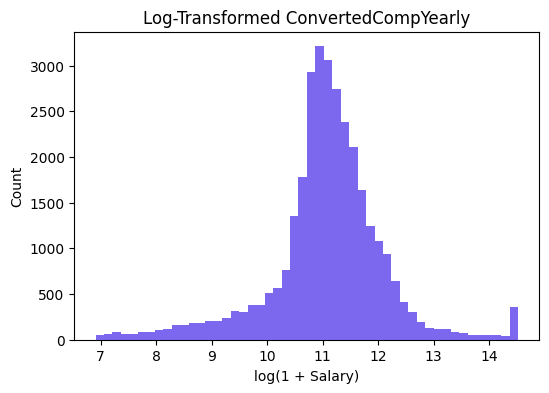

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (log1p handles zeros better: log(1 + x))
df_cleaned['Log_ConvertedCompYearly'] = np.log1p(df_cleaned['ConvertedCompYearly'])

# Plot the log-transformed version
plt.figure(figsize=(6, 4))
plt.hist(df_cleaned['Log_ConvertedCompYearly'], bins=50, color='mediumslateblue')
plt.title('Log-Transformed ConvertedCompYearly')
plt.xlabel('log(1 + Salary)')
plt.ylabel('Count')
plt.show()


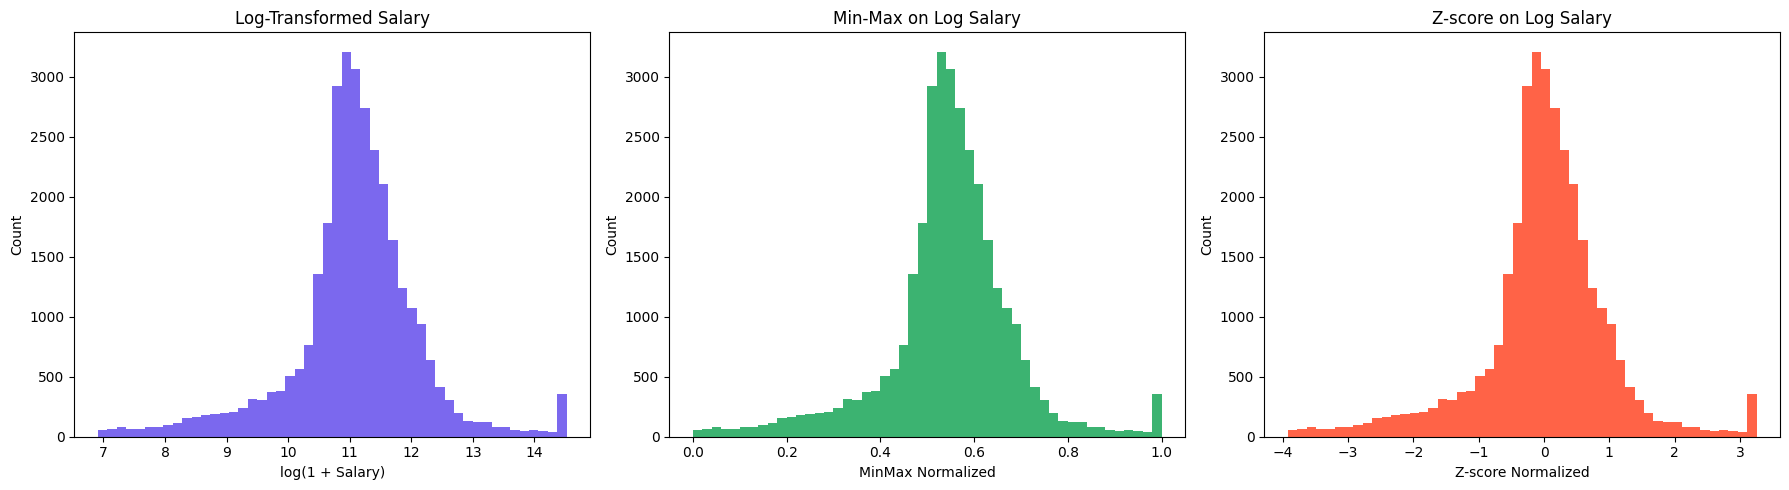

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Log-transform ConvertedCompYearly
df_cleaned['Log_ConvertedCompYearly'] = np.log1p(df_cleaned['ConvertedCompYearly'])

# Step 2: Normalize the log-transformed values

# Min-Max
minmax_scaler = MinMaxScaler()
df_cleaned['Log_Comp_MinMax'] = minmax_scaler.fit_transform(df_cleaned[['Log_ConvertedCompYearly']])

# Z-score
zscore_scaler = StandardScaler()
df_cleaned['Log_Comp_Zscore'] = zscore_scaler.fit_transform(df_cleaned[['Log_ConvertedCompYearly']])

# Step 3: Plot all three distributions
plt.figure(figsize=(18, 5))

# Log-transformed
plt.subplot(1, 3, 1)
plt.hist(df_cleaned['Log_ConvertedCompYearly'], bins=50, color='mediumslateblue')
plt.title('Log-Transformed Salary')
plt.xlabel('log(1 + Salary)')
plt.ylabel('Count')

# Min-Max normalized
plt.subplot(1, 3, 2)
plt.hist(df_cleaned['Log_Comp_MinMax'], bins=50, color='mediumseagreen')
plt.title('Min-Max on Log Salary')
plt.xlabel('MinMax Normalized')
plt.ylabel('Count')

# Z-score normalized
plt.subplot(1, 3, 3)
plt.hist(df_cleaned['Log_Comp_Zscore'], bins=50, color='tomato')
plt.title('Z-score on Log Salary')
plt.xlabel('Z-score Normalized')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Summary: Salary Normalization and Distribution Analysis

In this section, we focused on understanding and preparing the `ConvertedCompYearly` (annual compensation) data for analysis by addressing its extreme skew and applying normalization techniques.

#### Key Steps:

1. **Initial Inspection**:
   - The original `ConvertedCompYearly` column showed a strong right skew.
   - A significant number of outliers and very low values were present, including a minimum salary of only \$200.
   - Descriptive statistics and histogram visualizations confirmed a highly imbalanced distribution.

2. **Log Transformation**:
   - To reduce skew and better approximate a normal distribution, we applied a log transformation using `log1p`:
     ```python
     df_cleaned['Log_ConvertedCompYearly'] = np.log1p(df_cleaned['ConvertedCompYearly'])
     ```
   - This effectively compressed the long tail of high salaries and spread out mid-range values.

3. **Normalization Techniques**:
   - **Min-Max Scaling** and **Z-score Normalization** were applied to the log-transformed data:
     - Min-Max scaled values between 0 and 1.
     - Z-score normalization centered the data around a mean of 0 with standard deviation of 1.

4. **Visualization**:
   - Histograms of the original log-transformed data and both normalized versions were plotted side-by-side.
   - All three distributions retained the same bell-shaped form, indicating that normalization preserved the underlying distribution after log transformation.

#### Insights:

- The original salary data was heavily skewed and unsuitable for direct analysis or modeling.
- Log transformation greatly improved the distribution, making it more symmetric and normal-like.
- Normalization rescaled the data without altering its shape, which is critical for machine learning tasks that rely on scale (e.g., KNN, gradient descent, clustering).
- A small spike remained at the far right, likely due to very high salary outliers, even after transformation.

This preprocessing ensures that the `ConvertedCompYearly` variable is now suitable for downstream modeling and analysis.


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
